Rozmiar zbioru danych: (148670, 34)

Nazwy kolumn i typy danych:
ID                             int64
year                           int64
loan_limit                    object
Gender                        object
approv_in_adv                 object
loan_type                     object
loan_purpose                  object
Credit_Worthiness             object
open_credit                   object
business_or_commercial        object
loan_amount                    int64
rate_of_interest             float64
Interest_rate_spread         float64
Upfront_charges              float64
term                         float64
Neg_ammortization             object
interest_only                 object
lump_sum_payment              object
property_value               float64
construction_type             object
occupancy_type                object
Secured_by                    object
total_units                   object
income                       float64
credit_type                   object
Credit_Sco

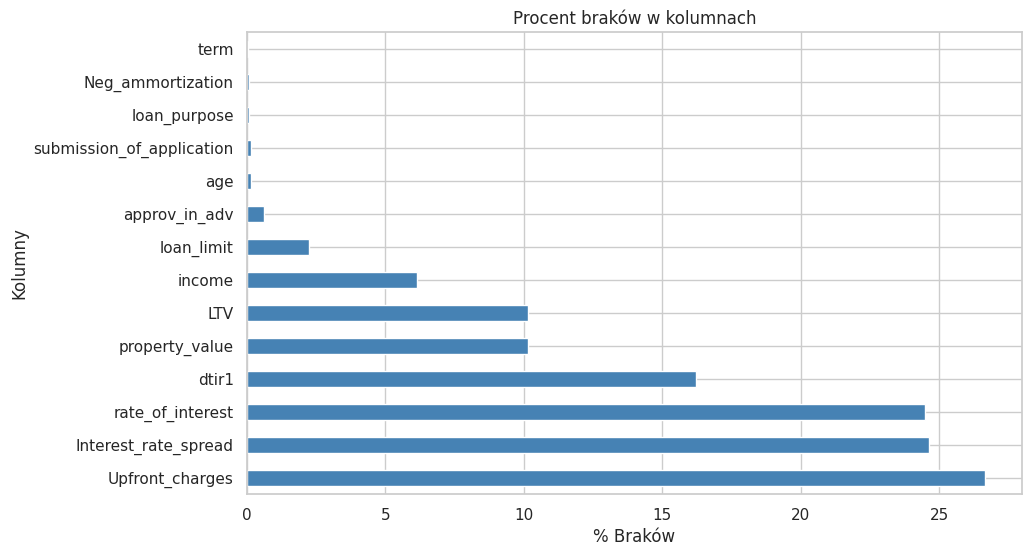


Podsumowanie statystyczne danych numerycznych:
                  ID      year   loan_amount  rate_of_interest  \
count  148670.000000  148670.0  1.486700e+05     112231.000000   
mean    99224.500000    2019.0  3.311177e+05          4.045476   
std     42917.476598       0.0  1.839093e+05          0.561391   
min     24890.000000    2019.0  1.650000e+04          0.000000   
25%     62057.250000    2019.0  1.965000e+05          3.625000   
50%     99224.500000    2019.0  2.965000e+05          3.990000   
75%    136391.750000    2019.0  4.365000e+05          4.375000   
max    173559.000000    2019.0  3.576500e+06          8.000000   

       Interest_rate_spread  Upfront_charges           term  property_value  \
count         112031.000000    109028.000000  148629.000000    1.335720e+05   
mean               0.441656      3224.996127     335.136582    4.978935e+05   
std                0.513043      3251.121510      58.409084    3.599353e+05   
min               -3.638000         0.000

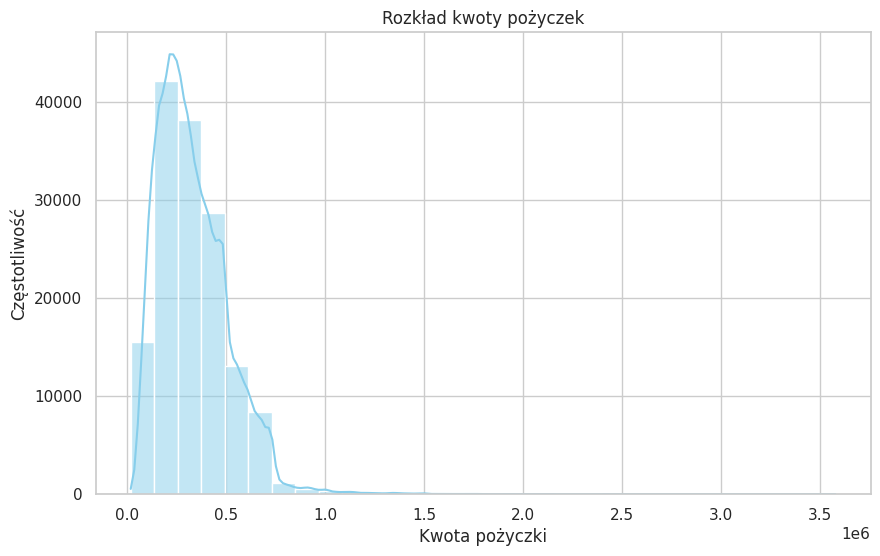

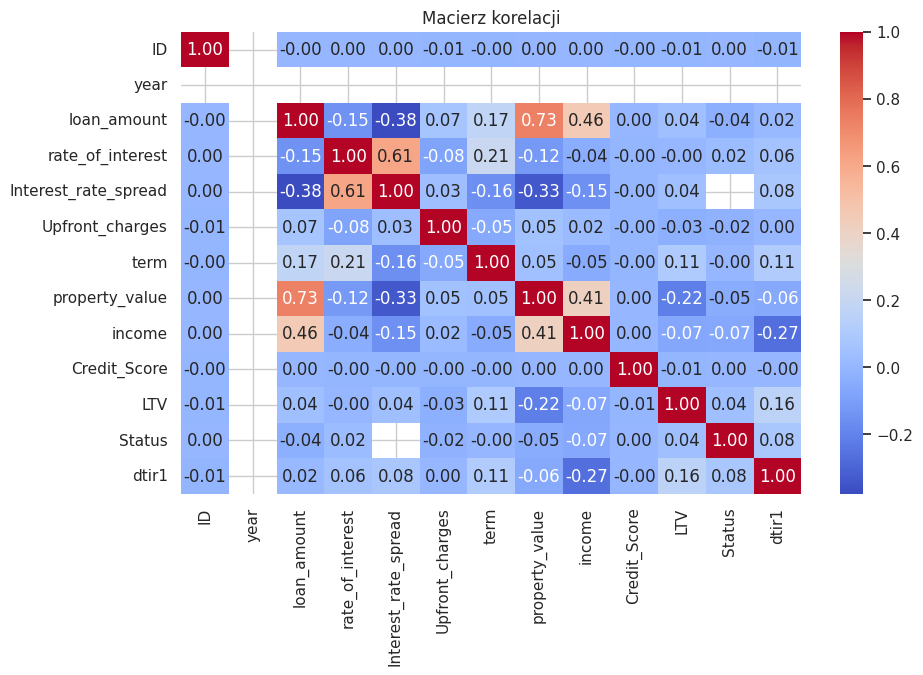

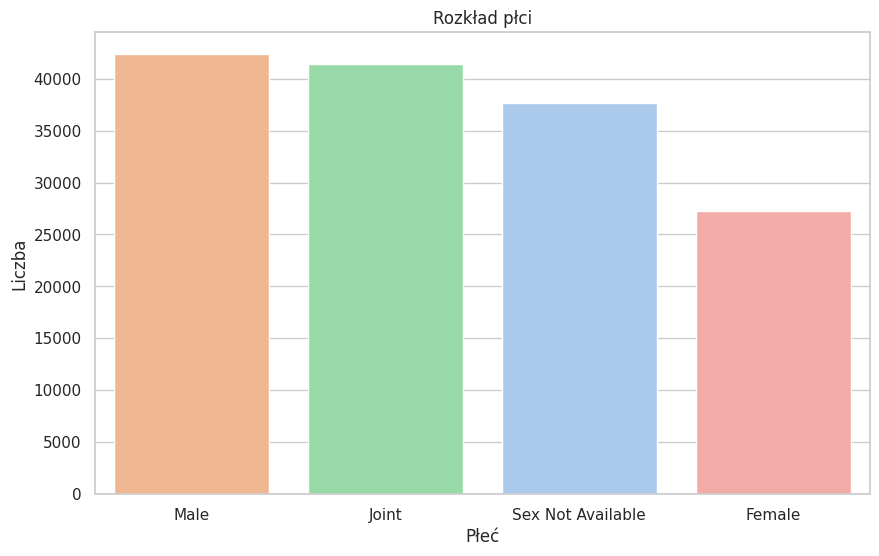

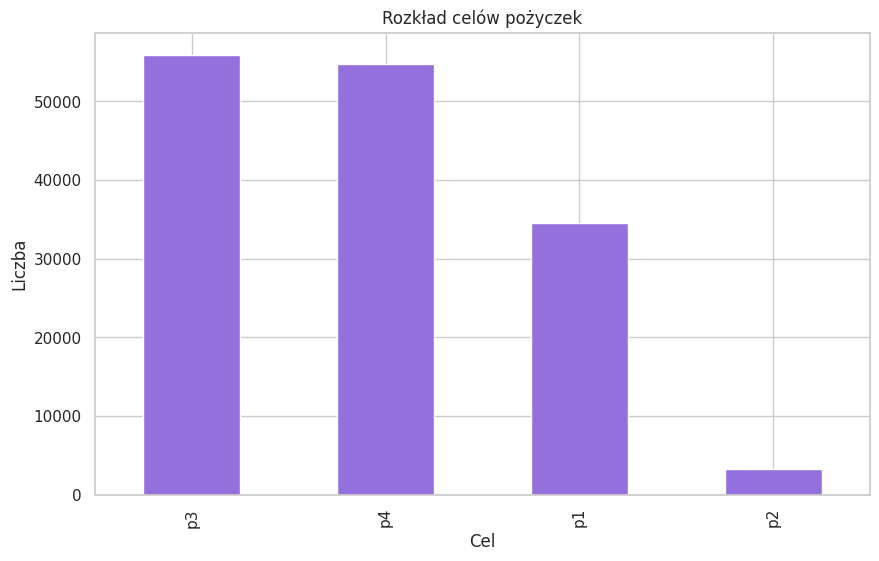

/tmp/ipykernel_1112/1434533841.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="Status", palette="muted")


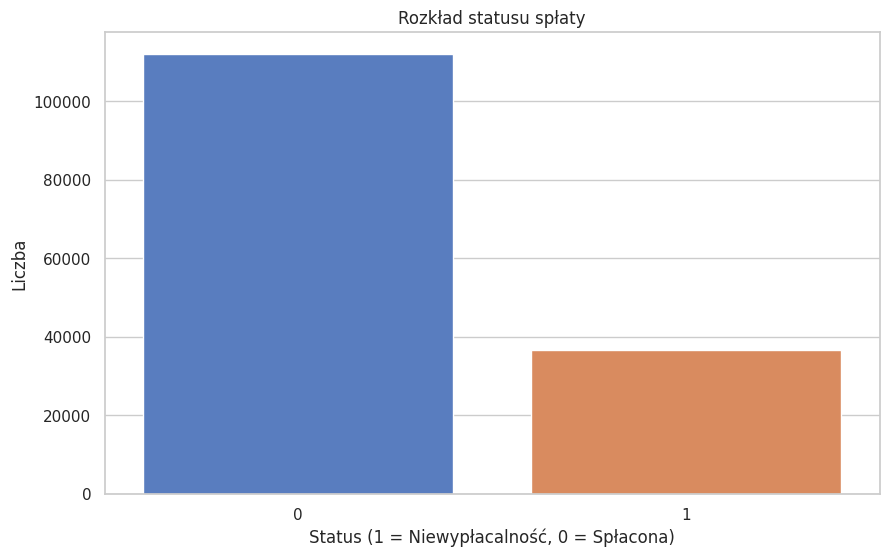

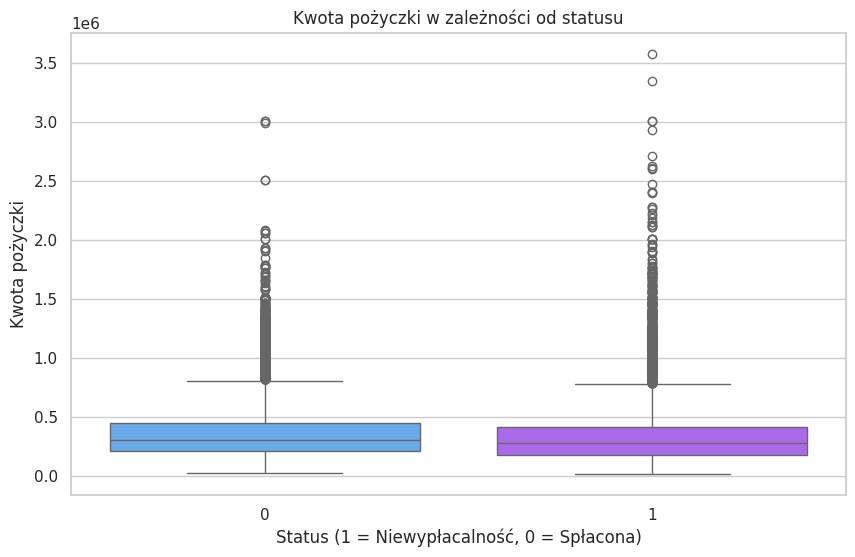

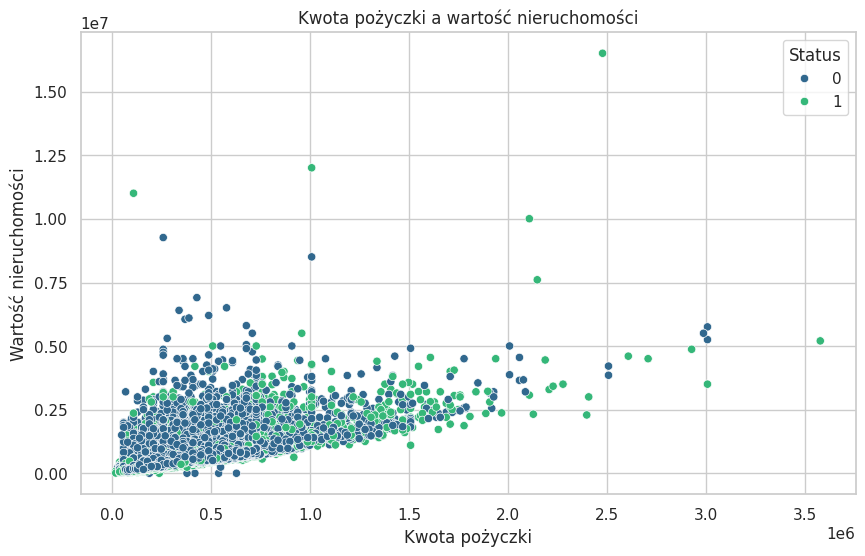

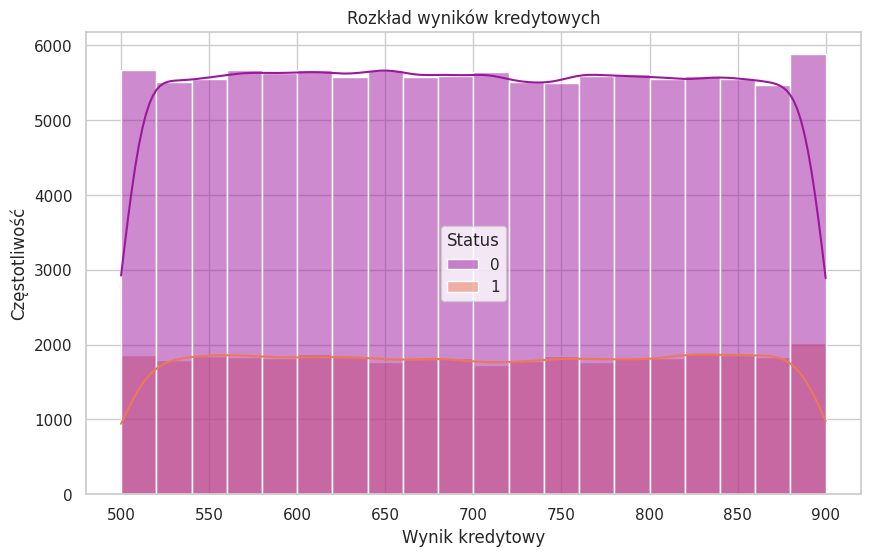

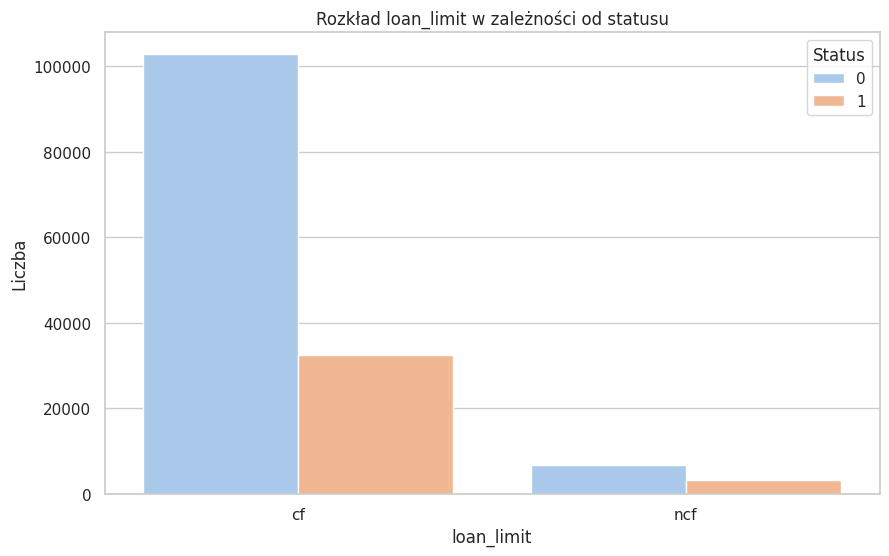

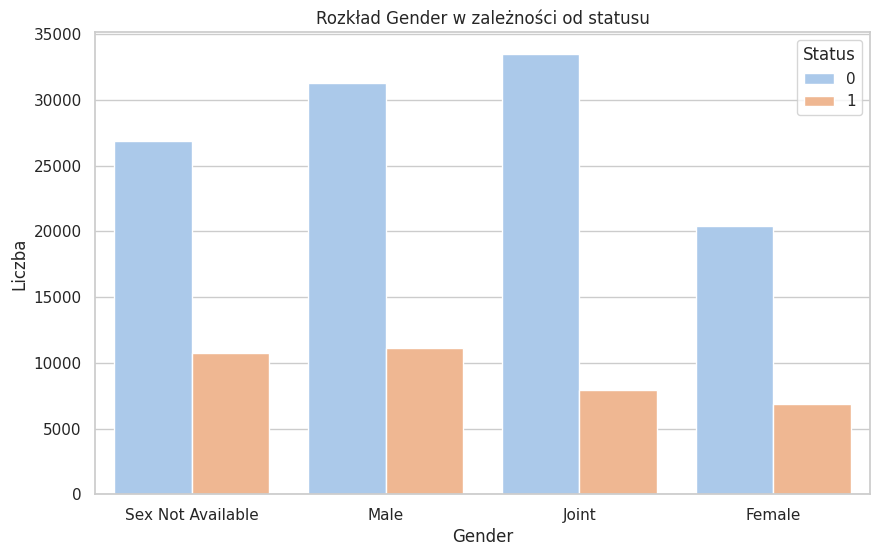

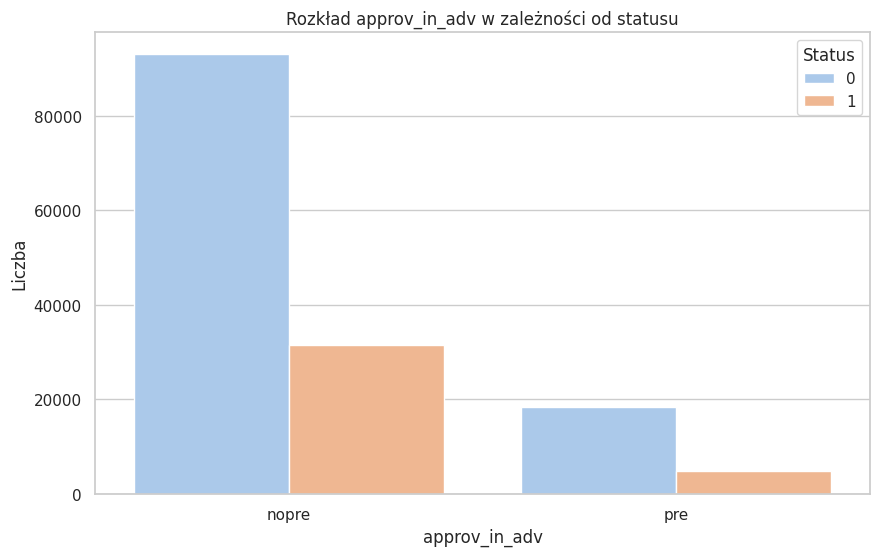

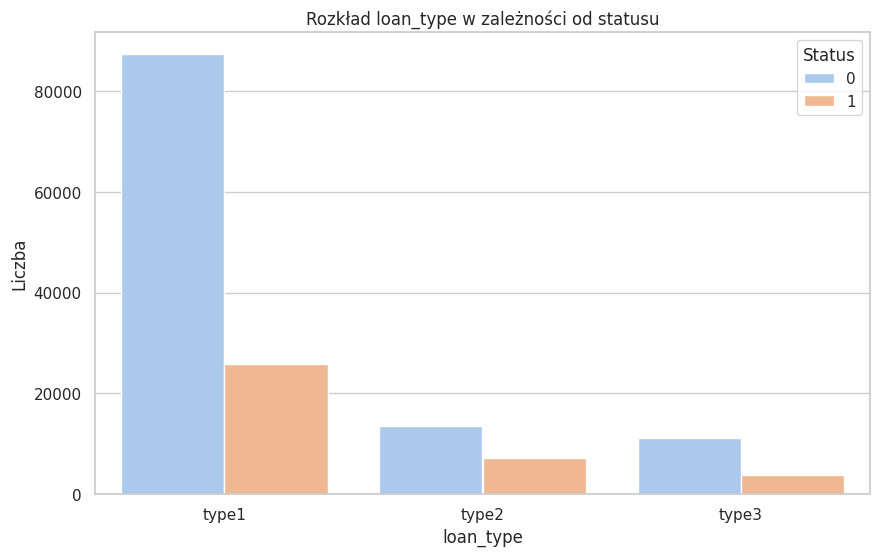

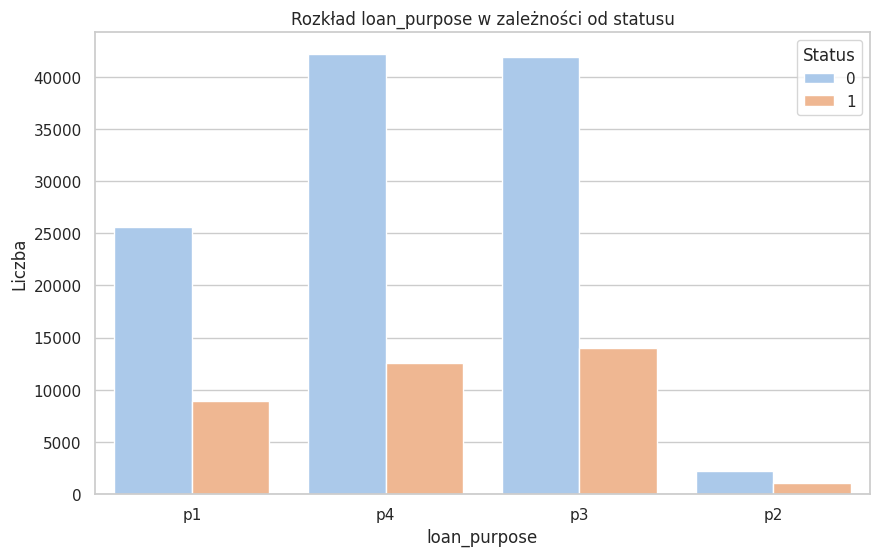

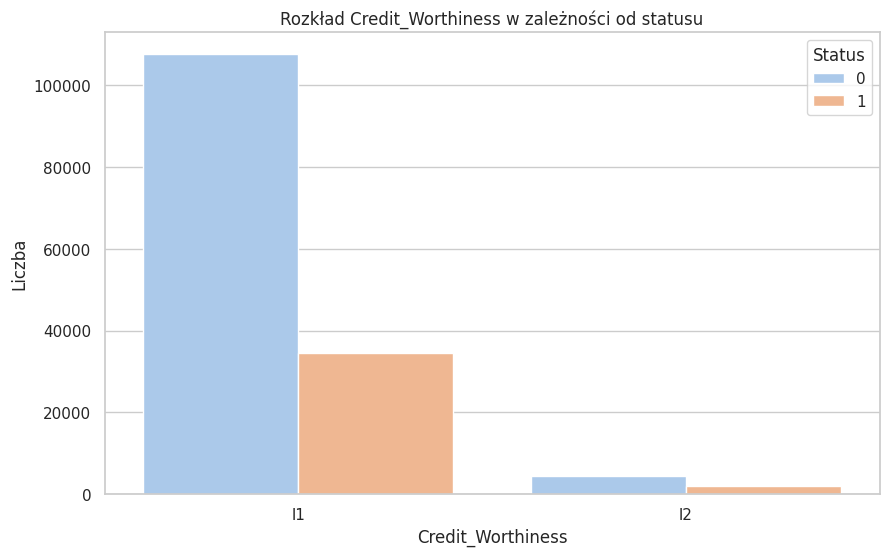

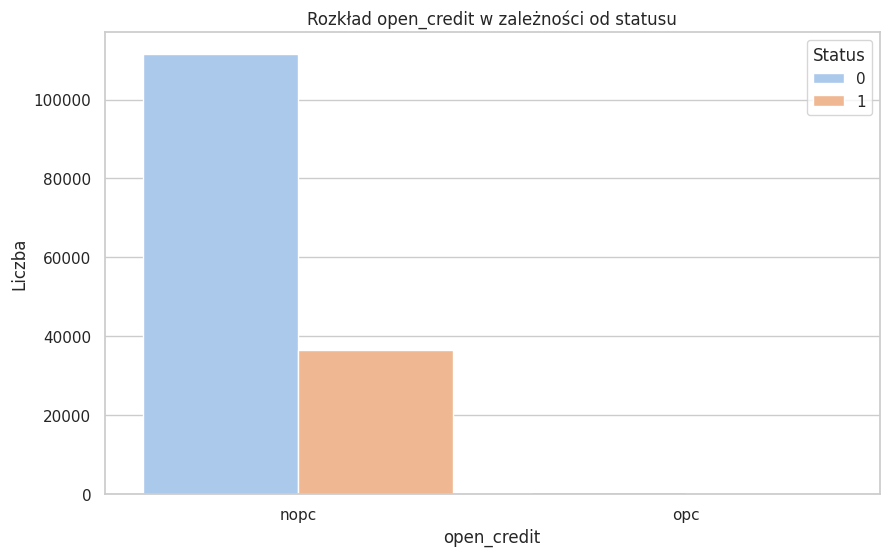

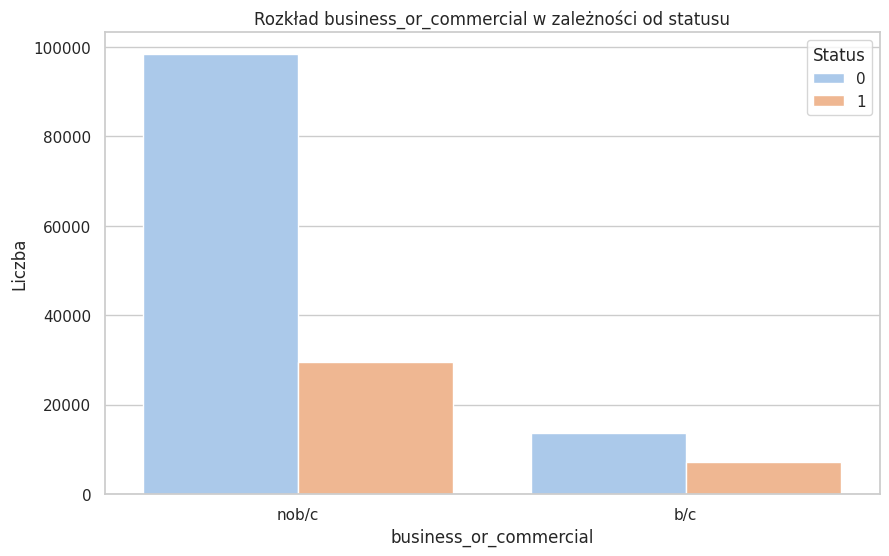

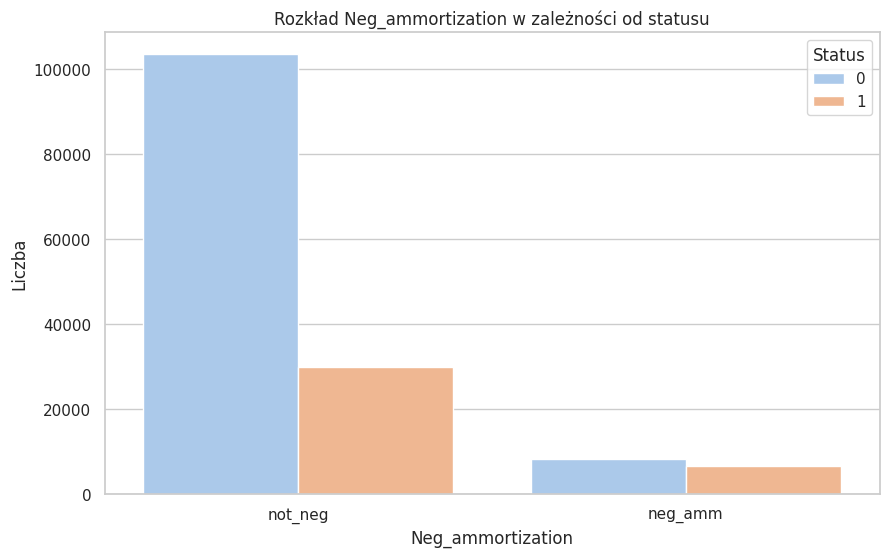

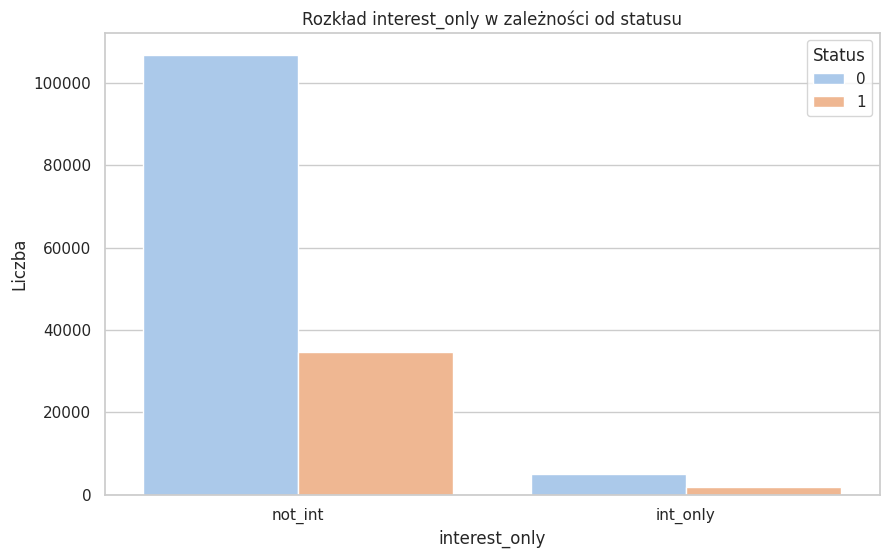

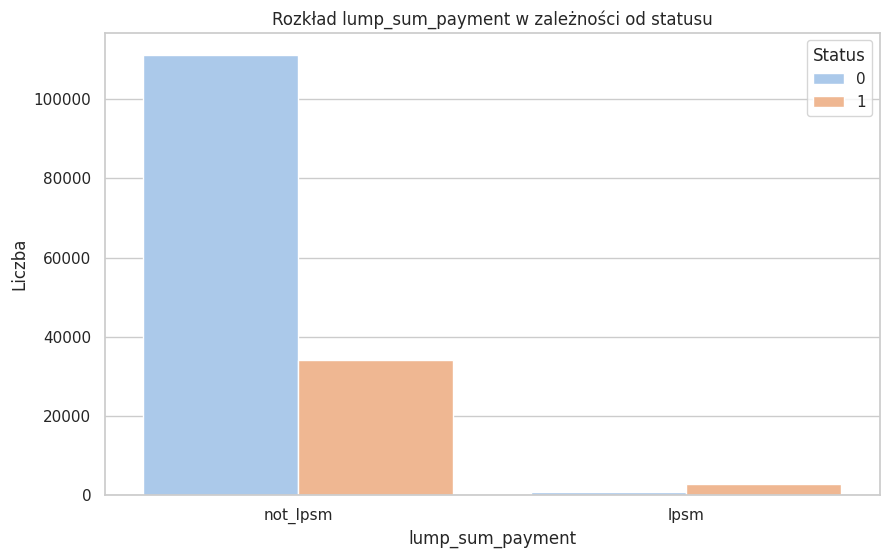

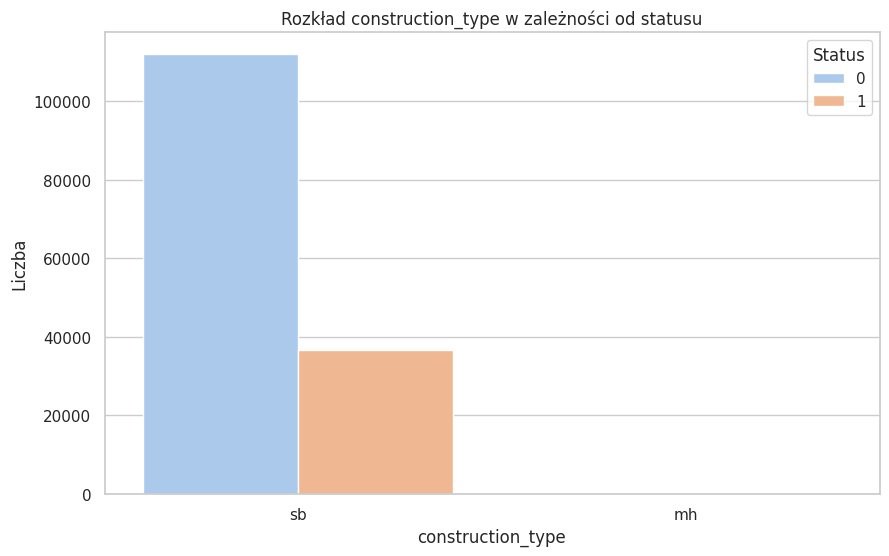

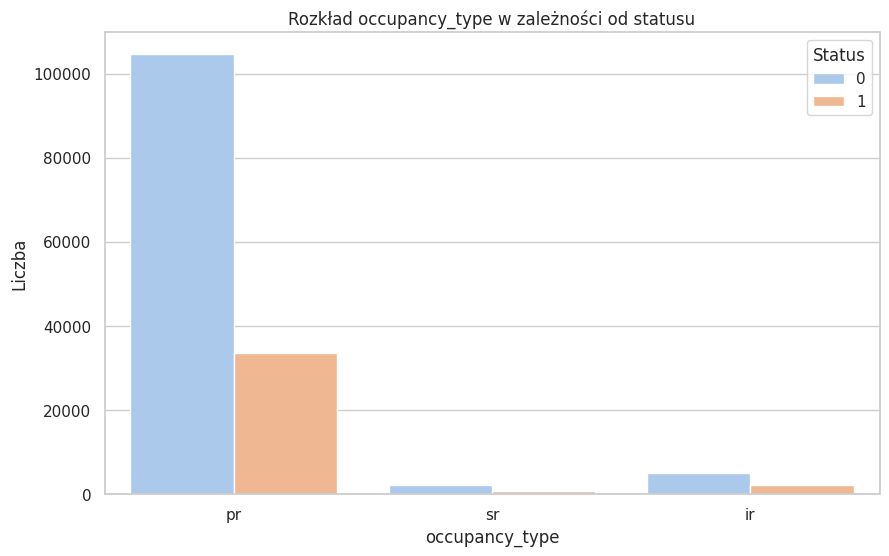

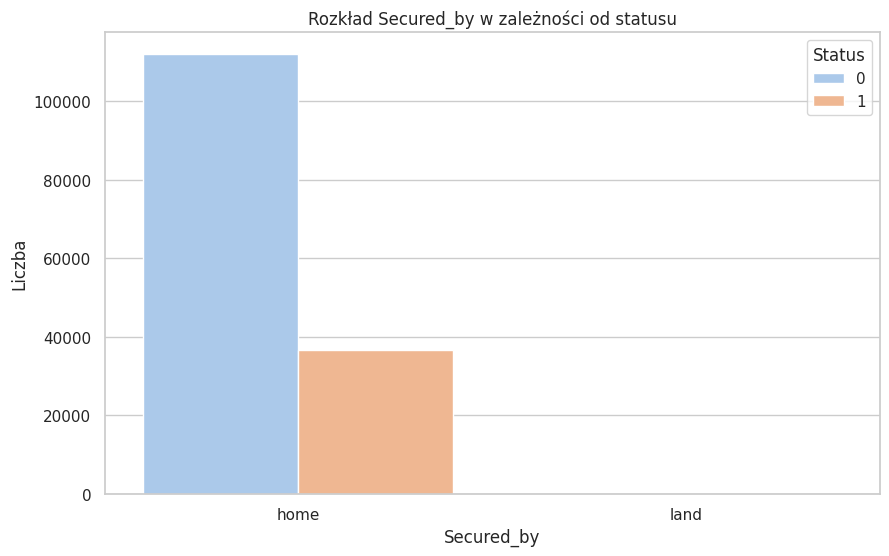

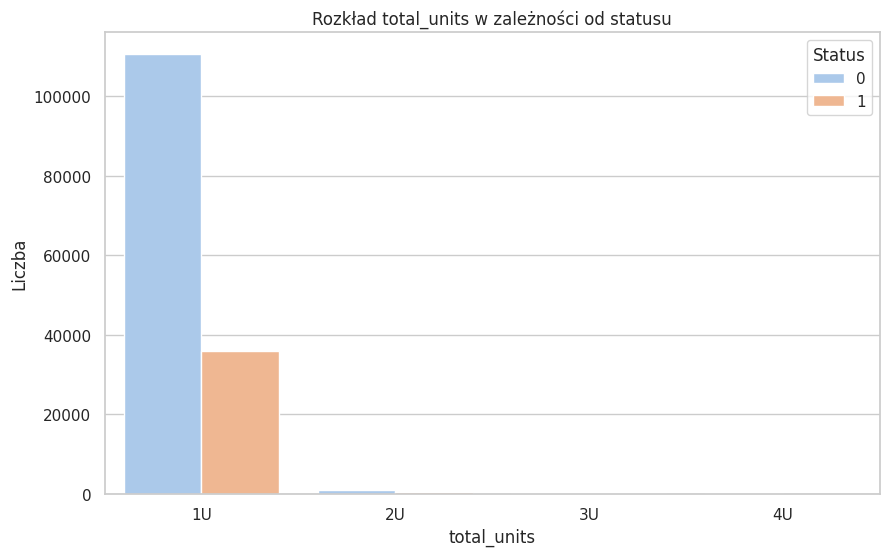

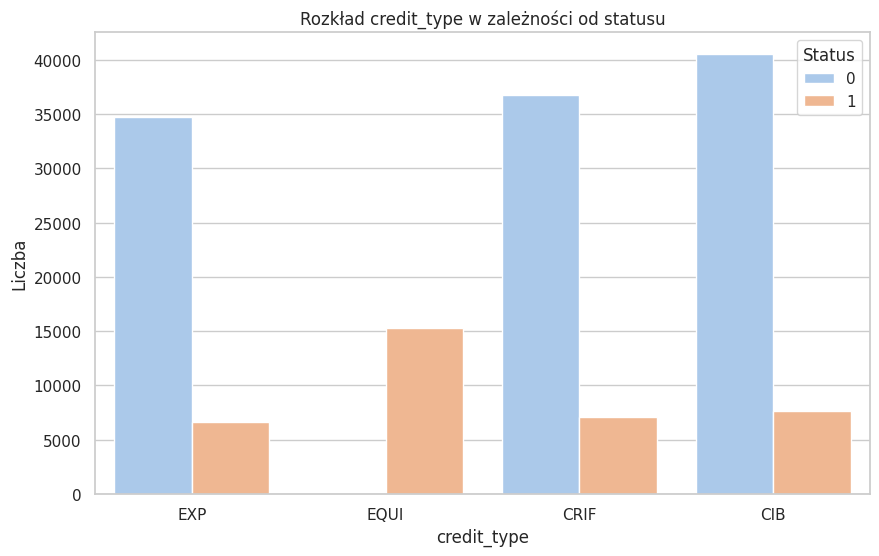

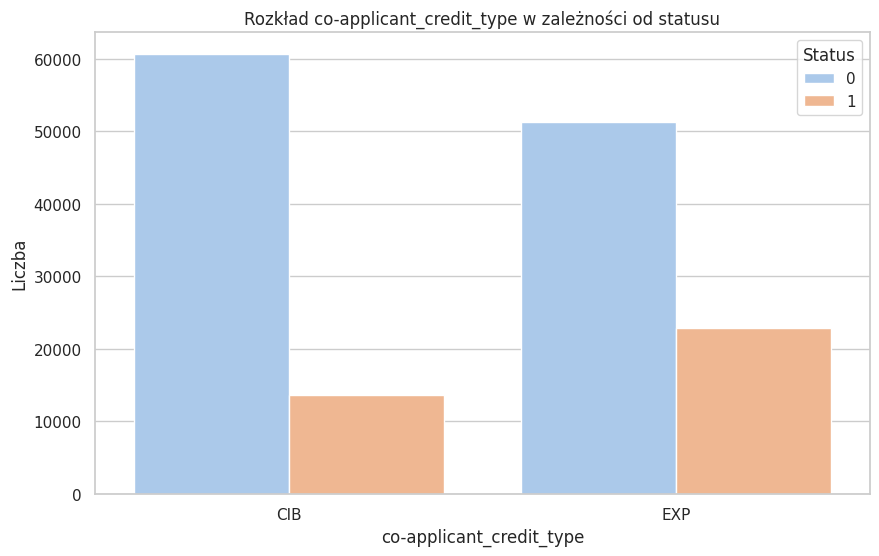

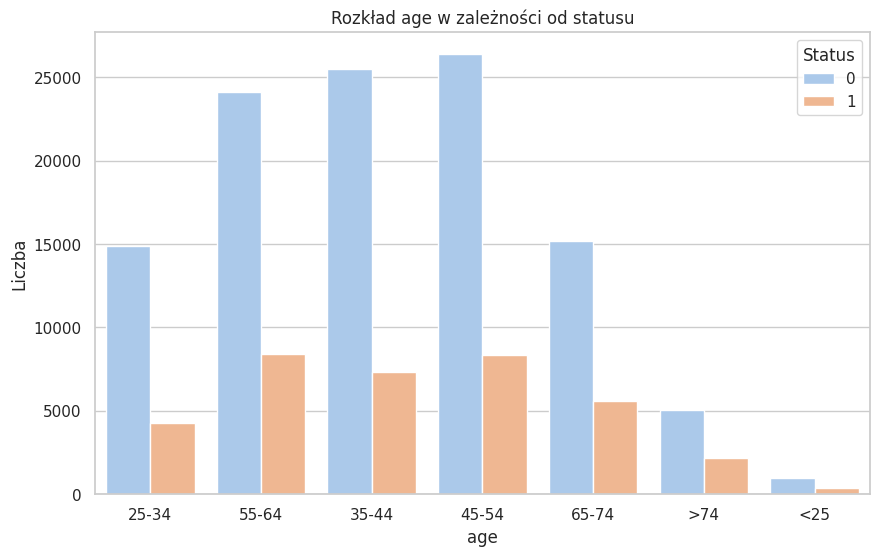

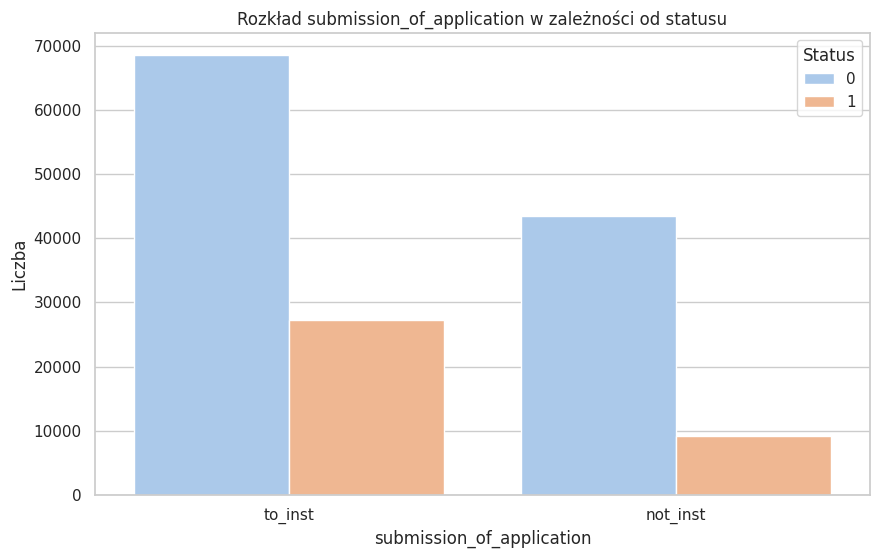

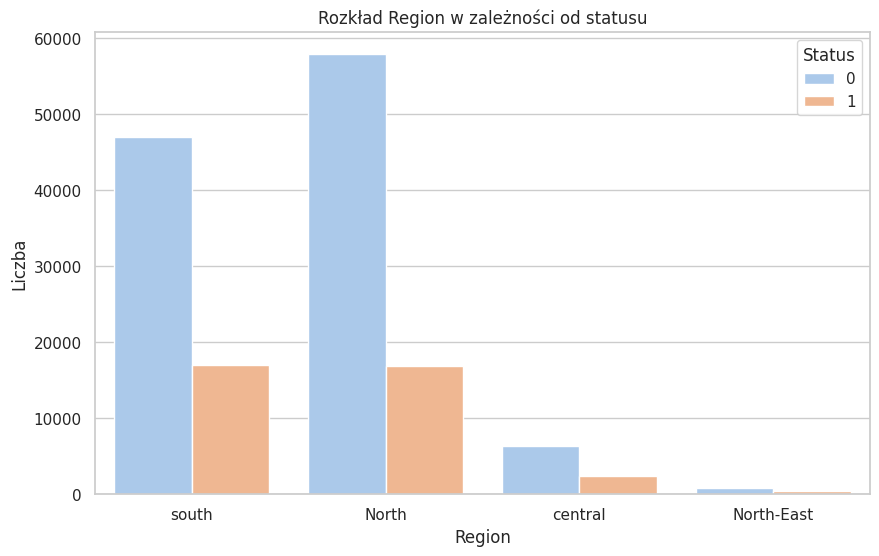

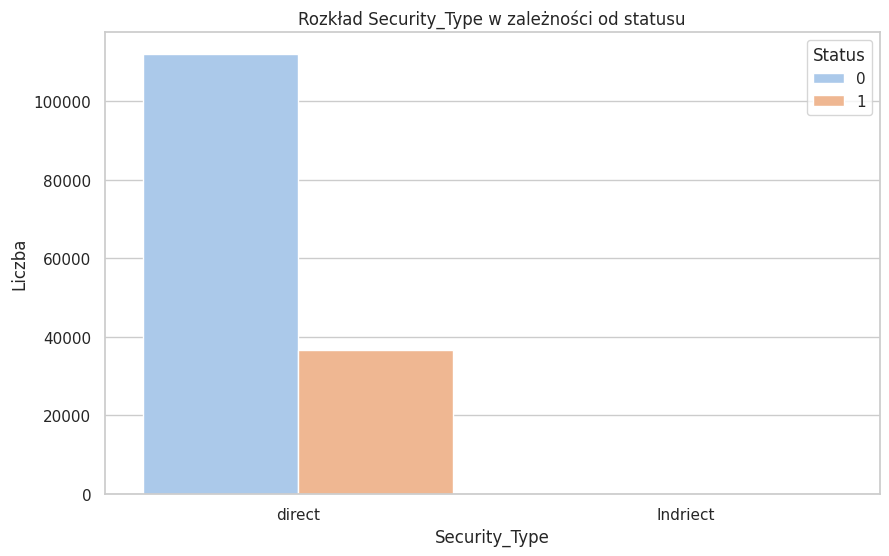

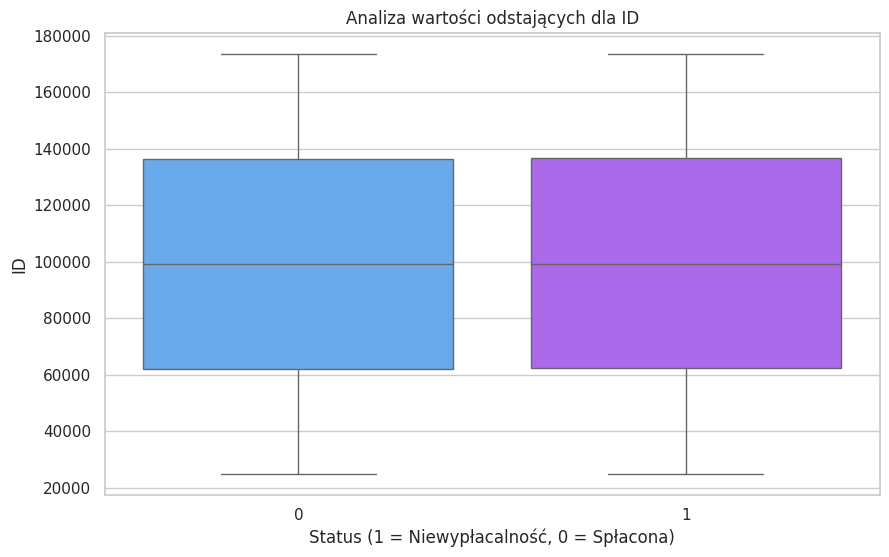

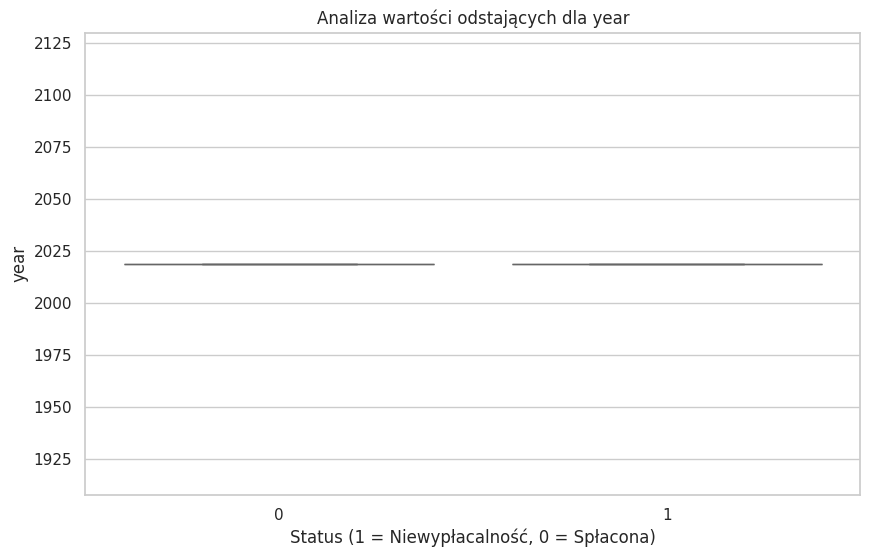

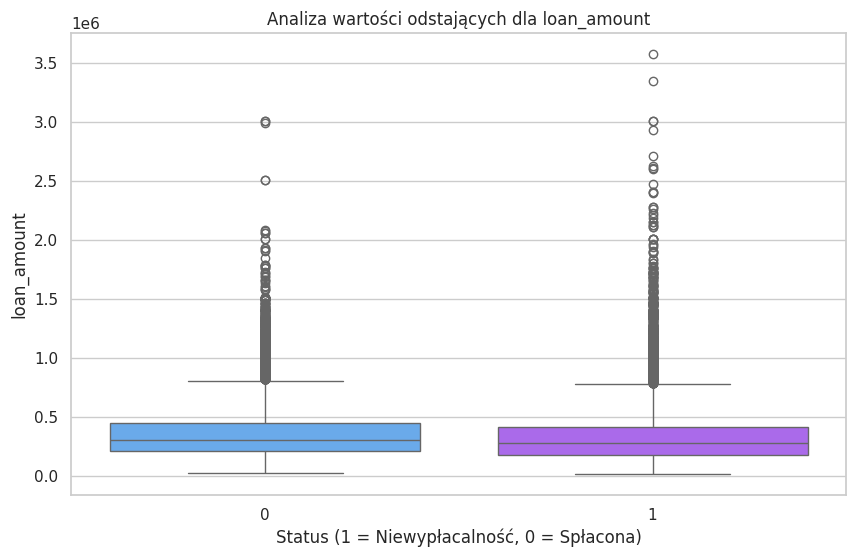

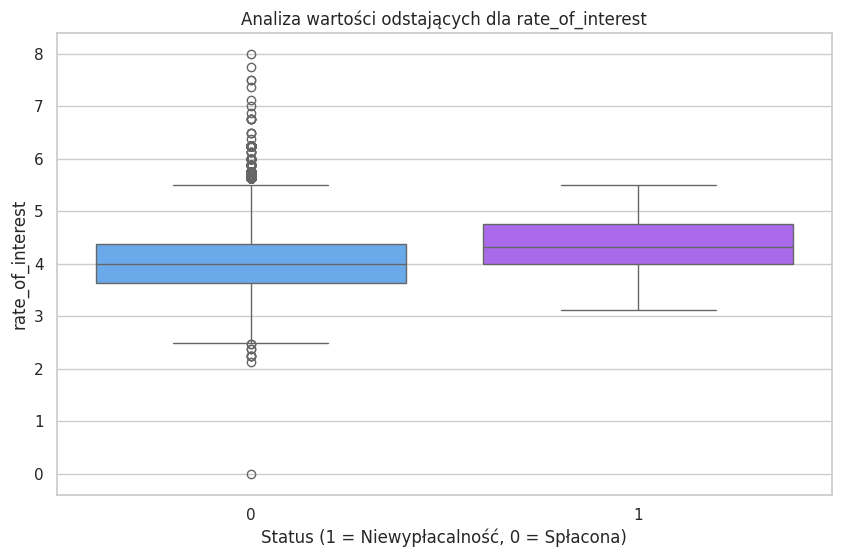

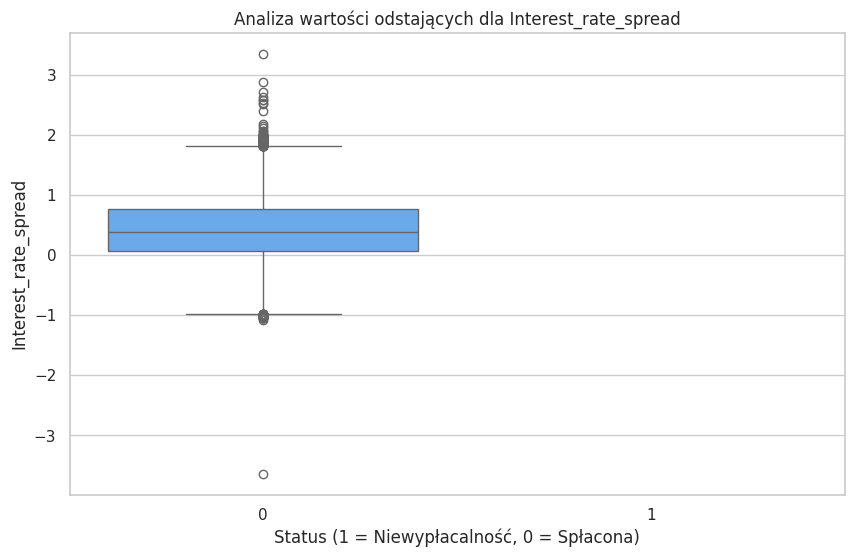

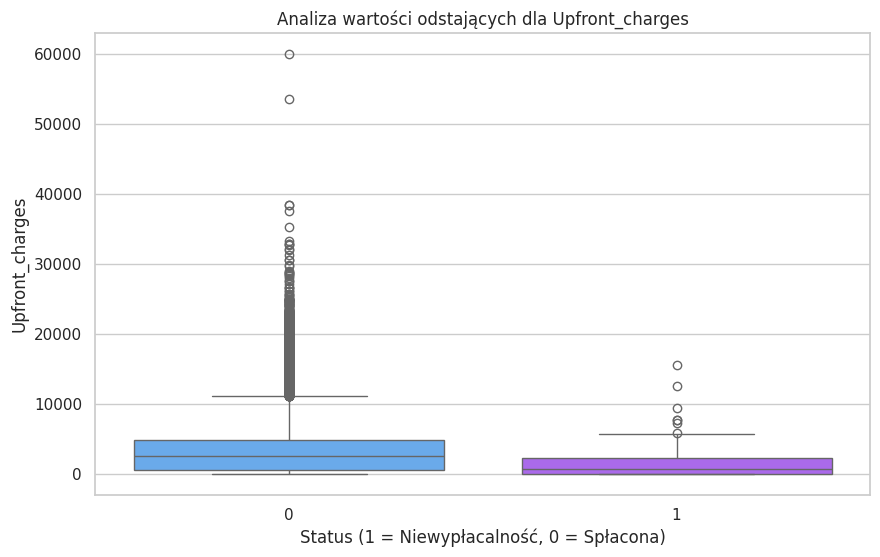

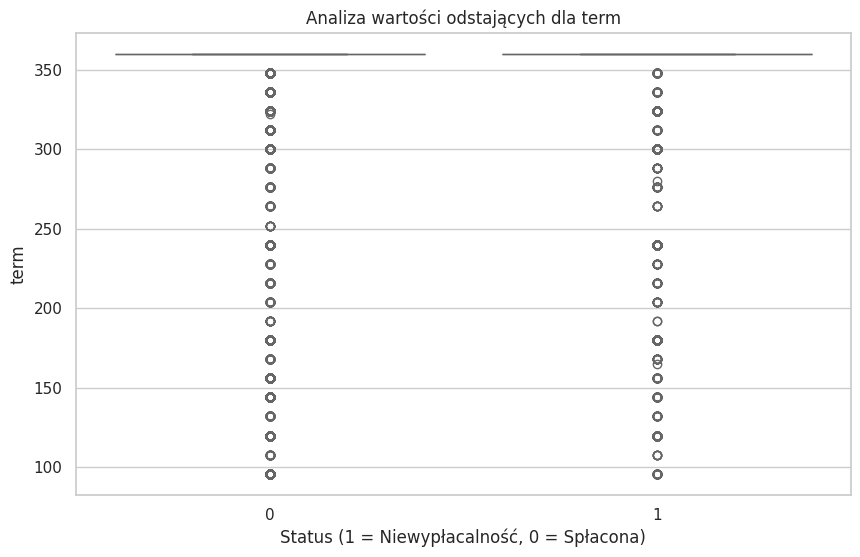

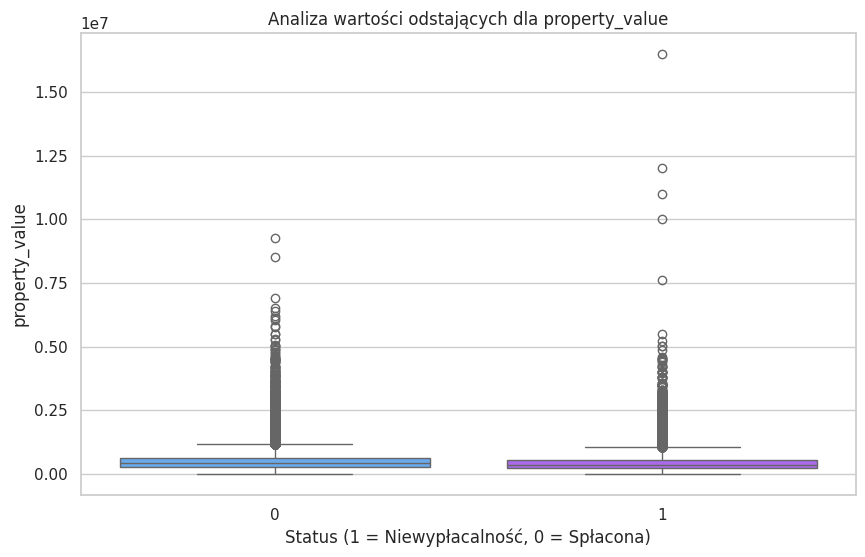

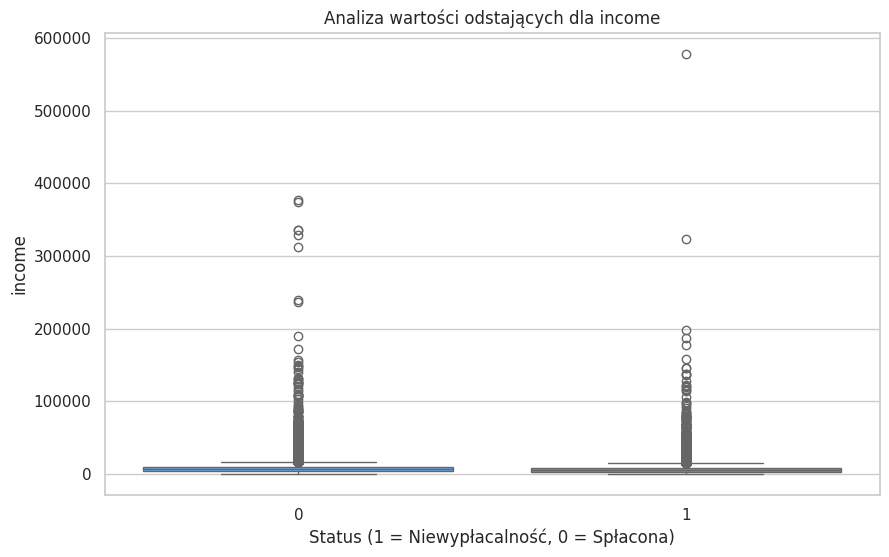

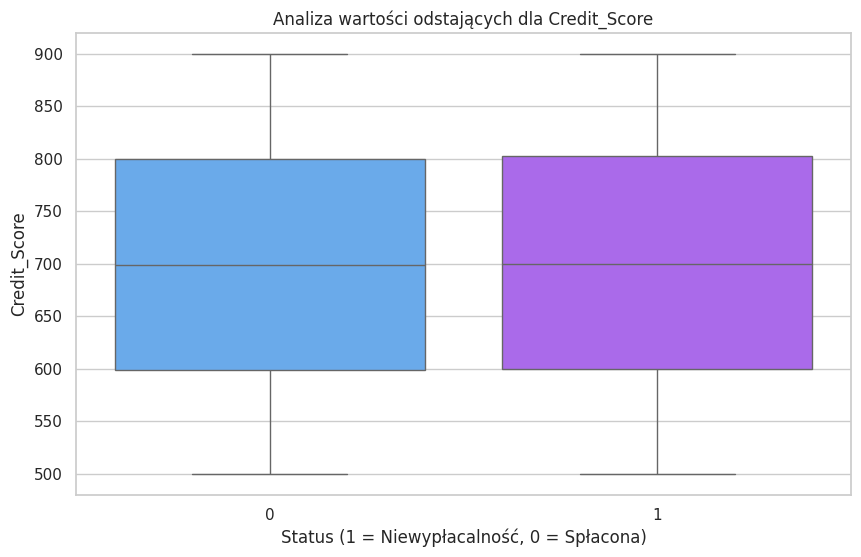

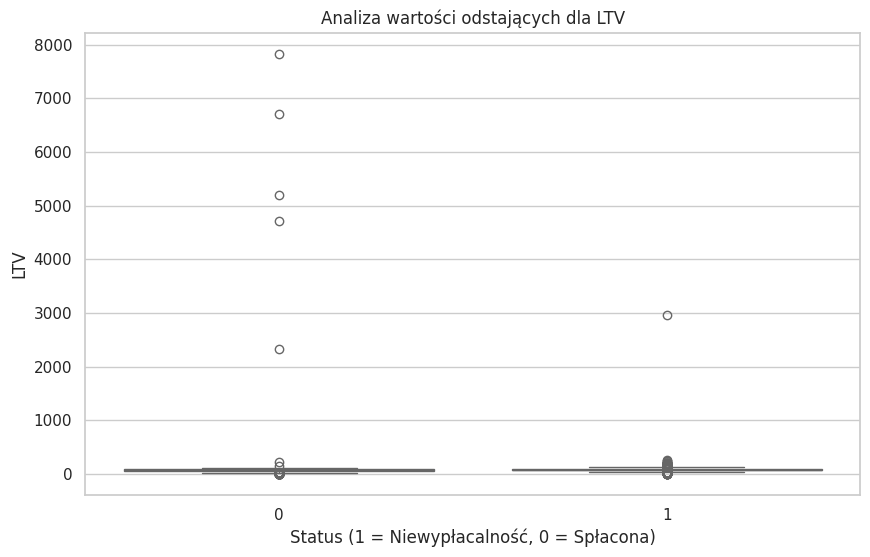

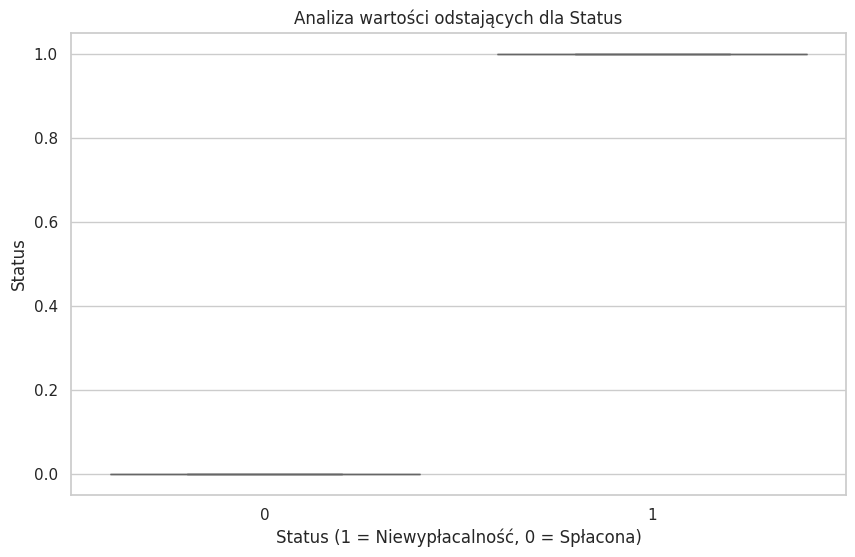

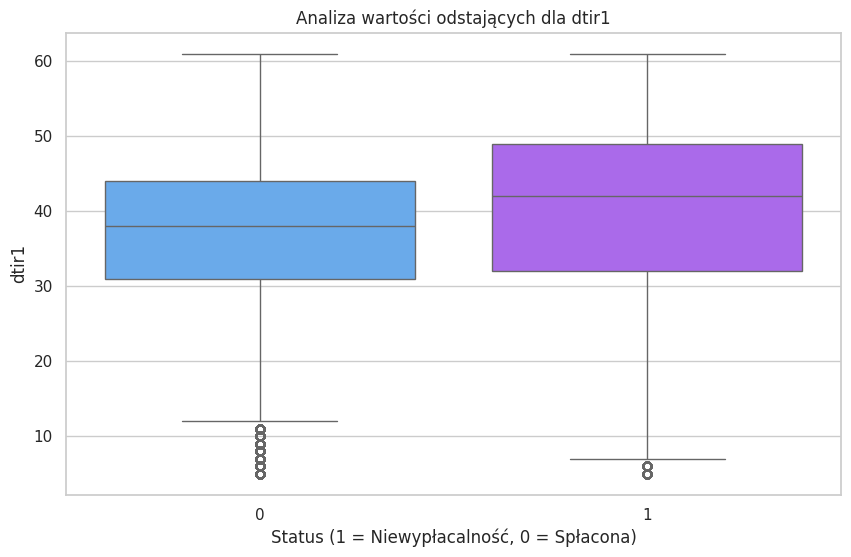


Wnioski:
- Istnieją pewne zmienne kategoryczne, które mogą mieć wpływ na zmienną docelową, np. 'Gender', 'loan_purpose'.
- Wartości odstające mogą wpływać na wyniki analizy, dlatego warto je dokładnie przeanalizować i ewentualnie usunąć.
- Zmienna 'loan_amount' wydaje się mieć związek ze statusem spłaty pożyczki, co może być istotne przy modelowaniu.
- Wartości kredytowe i wartości nieruchomości również mogą mieć wpływ na niewypłacalność, co warto uwzględnić w dalszej analizie.

Rekomendacje:
- Przeprowadzenie dalszej analizy zmiennych kategorycznych, aby lepiej zrozumieć ich wpływ na zmienną docelową.
- Dokładna analiza wartości odstających i ich wpływu na wyniki modelowania.
- Uwzględnienie zmiennych 'loan_amount', 'Credit_Score' i 'property_value' w modelu predykcyjnym.
- Wykorzystanie zaawansowanych technik wizualizacji do lepszego zrozumienia danych.
- Przygotowanie danych do modelowania (np. normalizacja, kodowanie zmiennych kategorycznych).


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

data = pd.read_csv("../../data/Loan_Default.csv")

print("Rozmiar zbioru danych:", data.shape)
print("\nNazwy kolumn i typy danych:")
print(data.dtypes)
print("\nPodgląd danych:")
print(data.head())

missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
missing_summary = pd.DataFrame({
    "Brakujące wartości": missing_values,
    "% Braków": missing_percentage
}).sort_values(by="% Braków", ascending=False)

print("\nPodsumowanie brakujących wartości:")
print(missing_summary)

def plot_missing_values(summary):
    summary_filtered = summary[summary["% Braków"] > 0]
    summary_filtered["% Braków"].plot(kind='barh', color='steelblue')
    plt.title("Procent braków w kolumnach")
    plt.xlabel("% Braków")
    plt.ylabel("Kolumny")
    plt.show()

plot_missing_values(missing_summary)

numerical_data = data.select_dtypes(include=[np.number])
print("\nPodsumowanie statystyczne danych numerycznych:")
print(numerical_data.describe())

sns.histplot(data=data, x="loan_amount", bins=30, kde=True, color="skyblue")
plt.title("Rozkład kwoty pożyczek")
plt.xlabel("Kwota pożyczki")
plt.ylabel("Częstotliwość")
plt.show()

correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Macierz korelacji")
plt.show()

sns.countplot(data=data, x="Gender", hue="Gender", order=data["Gender"].value_counts().index, palette="pastel", legend=False)
plt.title("Rozkład płci")
plt.xlabel("Płeć")
plt.ylabel("Liczba")
plt.show()

loan_purpose_counts = data["loan_purpose"].value_counts()
loan_purpose_counts.plot(kind='bar', color='mediumpurple')
plt.title("Rozkład celów pożyczek")
plt.xlabel("Cel")
plt.ylabel("Liczba")
plt.show()

sns.countplot(data=data, x="Status", palette="muted")
plt.title("Rozkład statusu spłaty")
plt.xlabel("Status (1 = Niewypłacalność, 0 = Spłacona)")
plt.ylabel("Liczba")
plt.show()

sns.boxplot(data=data, x="Status", y="loan_amount", hue="Status", palette="cool", legend=False)
plt.title("Kwota pożyczki w zależności od statusu")
plt.xlabel("Status (1 = Niewypłacalność, 0 = Spłacona)")
plt.ylabel("Kwota pożyczki")
plt.show()

sns.scatterplot(data=data, x="loan_amount", y="property_value", hue="Status", palette="viridis")
plt.title("Kwota pożyczki a wartość nieruchomości")
plt.xlabel("Kwota pożyczki")
plt.ylabel("Wartość nieruchomości")
plt.show()

sns.histplot(data=data, x="Credit_Score", kde=True, hue="Status", palette="plasma", bins=20)
plt.title("Rozkład wyników kredytowych")
plt.xlabel("Wynik kredytowy")
plt.ylabel("Częstotliwość")
plt.show()

categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=column, hue="Status", palette="pastel")
    plt.title(f"Rozkład {column} w zależności od statusu")
    plt.xlabel(column)
    plt.ylabel("Liczba")
    plt.legend(title="Status", loc='upper right')
    plt.show()

numerical_columns = numerical_data.columns
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data, x="Status", y=column, hue="Status", palette="cool", legend=False)
    plt.title(f"Analiza wartości odstających dla {column}")
    plt.xlabel("Status (1 = Niewypłacalność, 0 = Spłacona)")
    plt.ylabel(column)
    plt.show()

print("\nWnioski:")
print("- Istnieją pewne zmienne kategoryczne, które mogą mieć wpływ na zmienną docelową, np. 'Gender', 'loan_purpose'.")
print("- Wartości odstające mogą wpływać na wyniki analizy, dlatego warto je dokładnie przeanalizować i ewentualnie usunąć.")
print("- Zmienna 'loan_amount' wydaje się mieć związek ze statusem spłaty pożyczki, co może być istotne przy modelowaniu.")
print("- Wartości kredytowe i wartości nieruchomości również mogą mieć wpływ na niewypłacalność, co warto uwzględnić w dalszej analizie.")

print("\nRekomendacje:")
print("- Przeprowadzenie dalszej analizy zmiennych kategorycznych, aby lepiej zrozumieć ich wpływ na zmienną docelową.")
print("- Dokładna analiza wartości odstających i ich wpływu na wyniki modelowania.")
print("- Uwzględnienie zmiennych 'loan_amount', 'Credit_Score' i 'property_value' w modelu predykcyjnym.")
print("- Wykorzystanie zaawansowanych technik wizualizacji do lepszego zrozumienia danych.")
print("- Przygotowanie danych do modelowania (np. normalizacja, kodowanie zmiennych kategorycznych).")

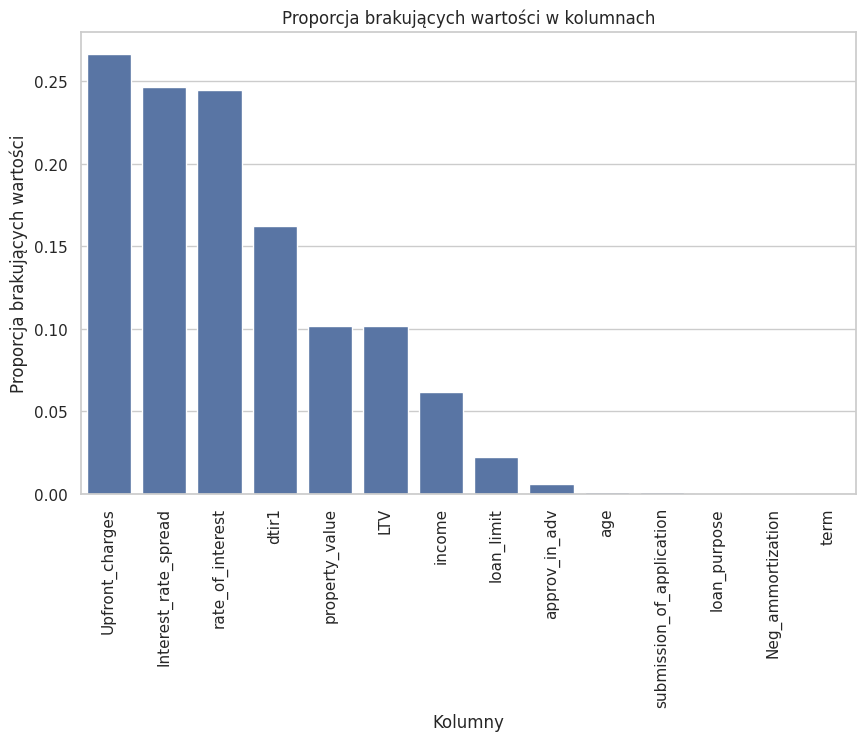

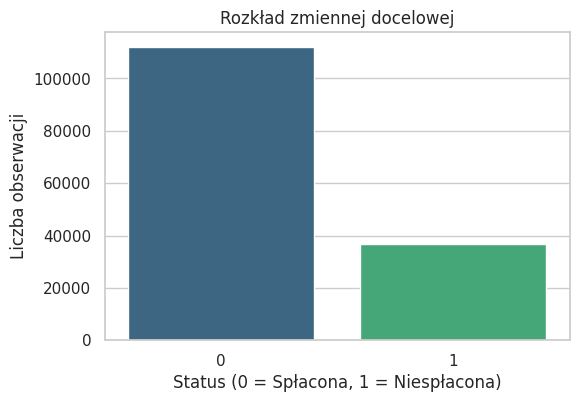

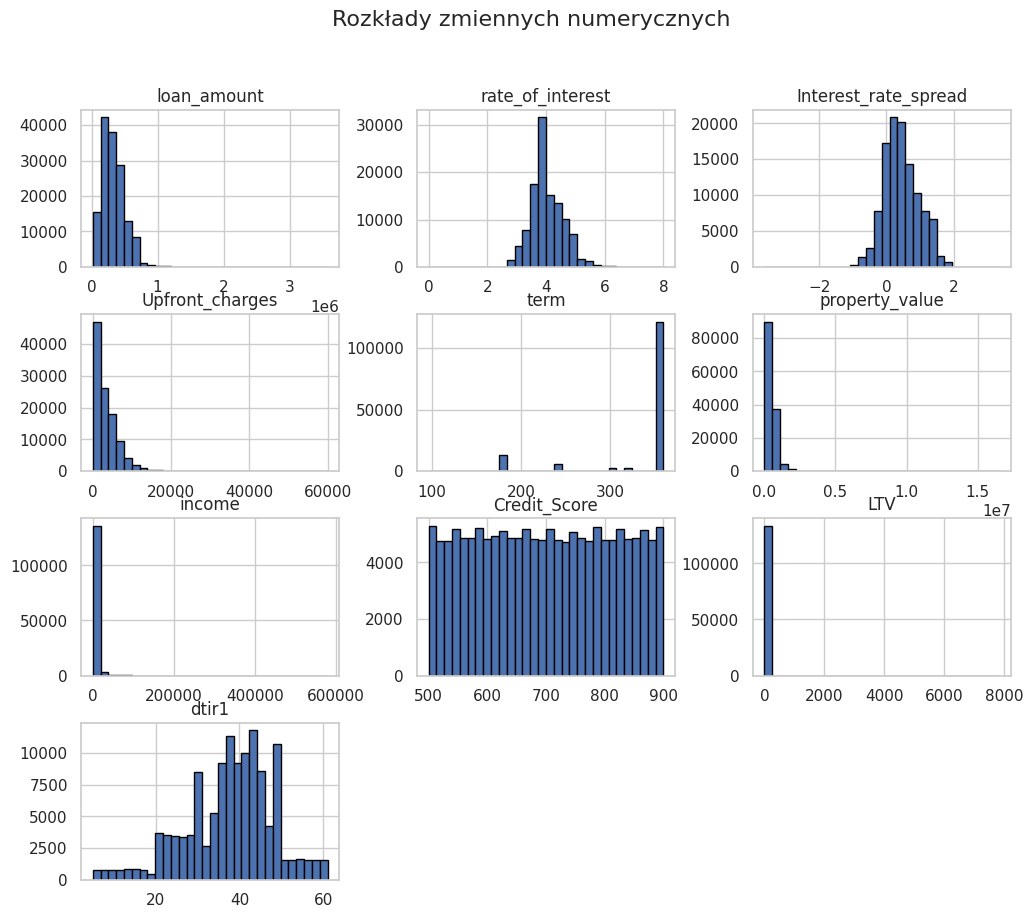

/home/qba/repos/ML_intro_24-25/ml_env/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/qba/repos/ML_intro_24-25/ml_env/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


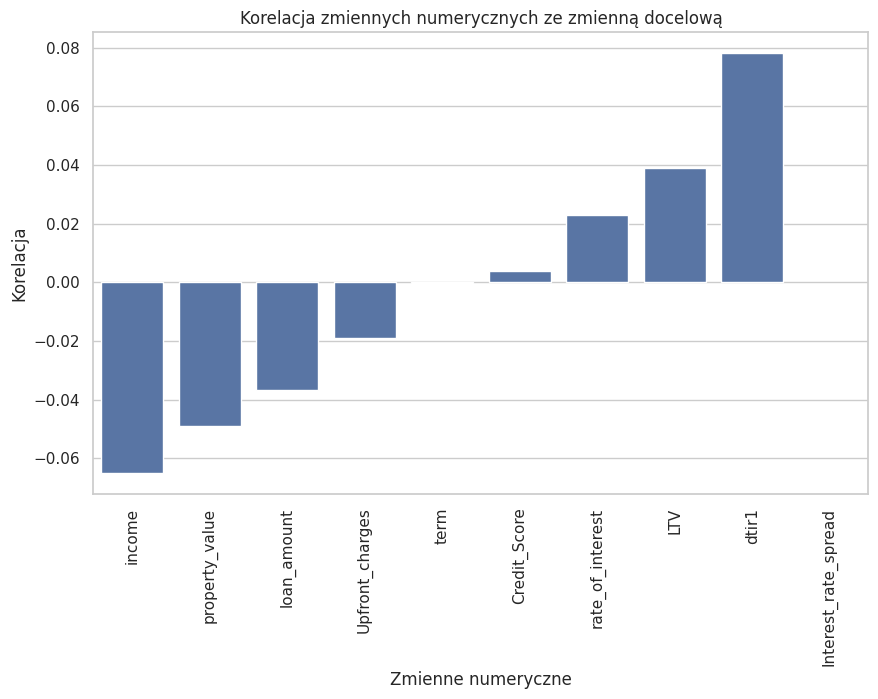

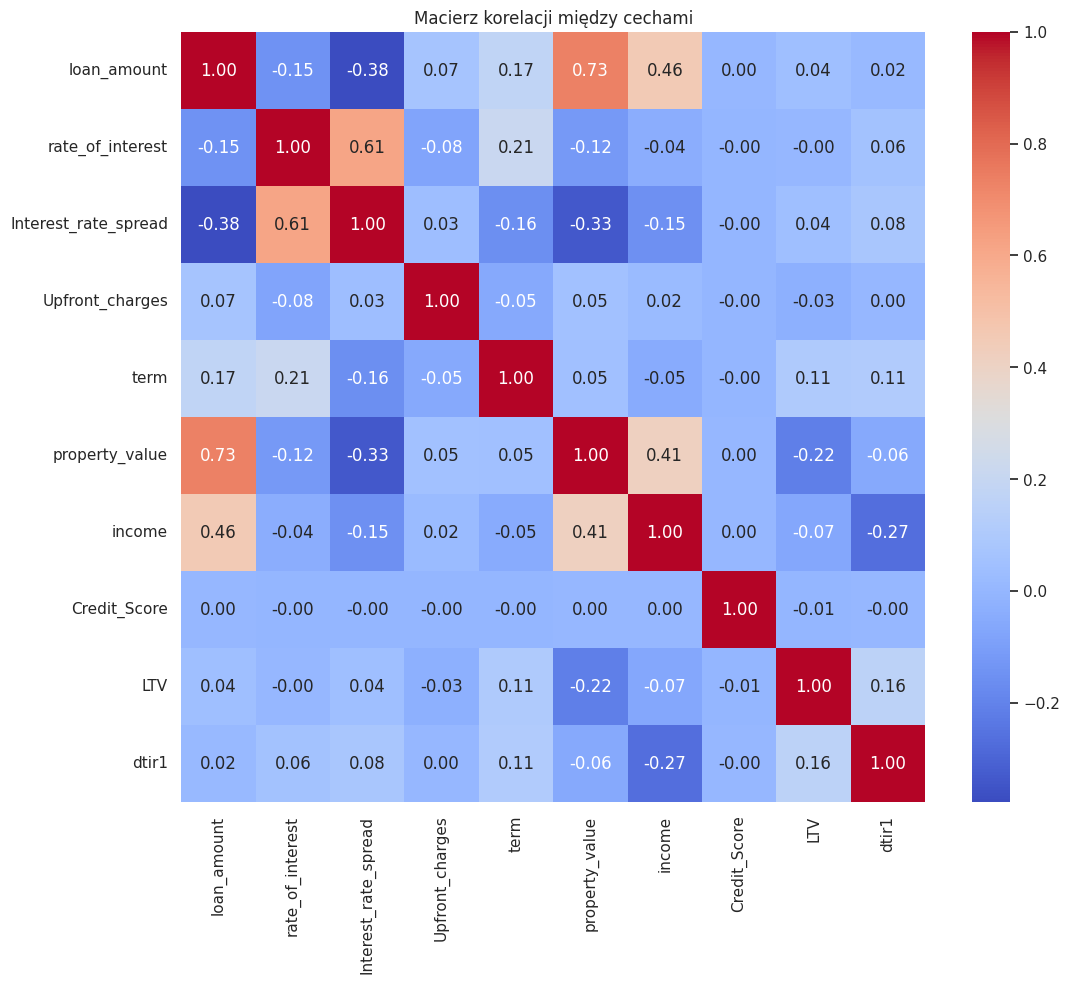

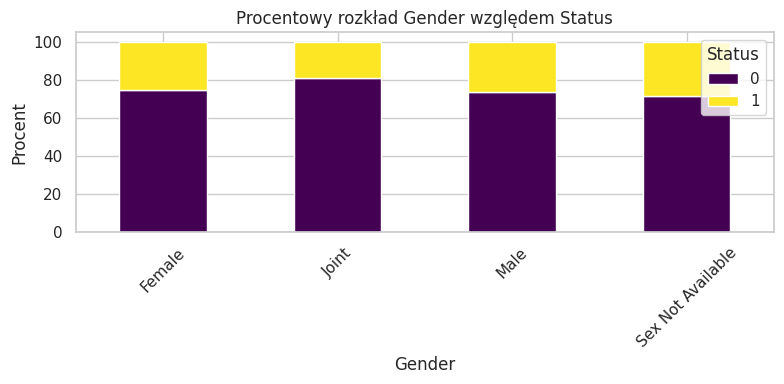

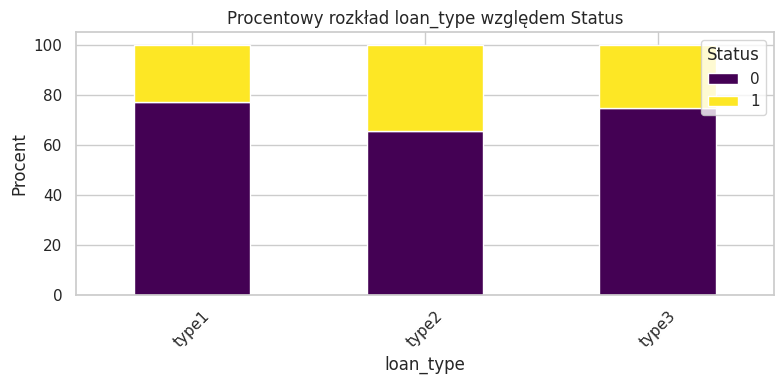

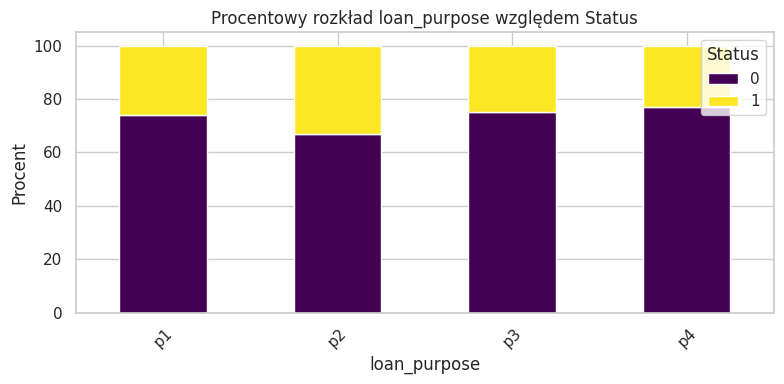

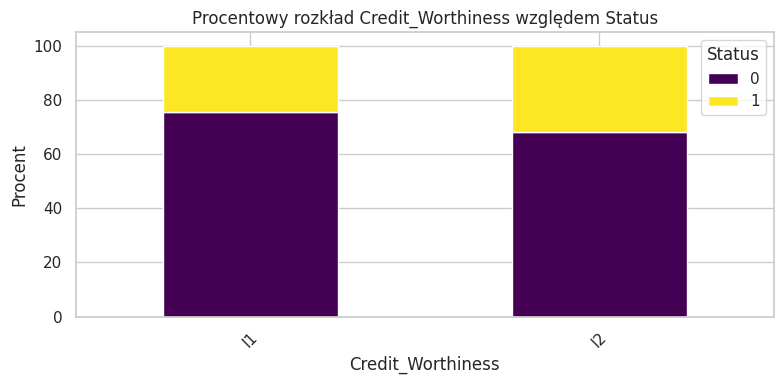

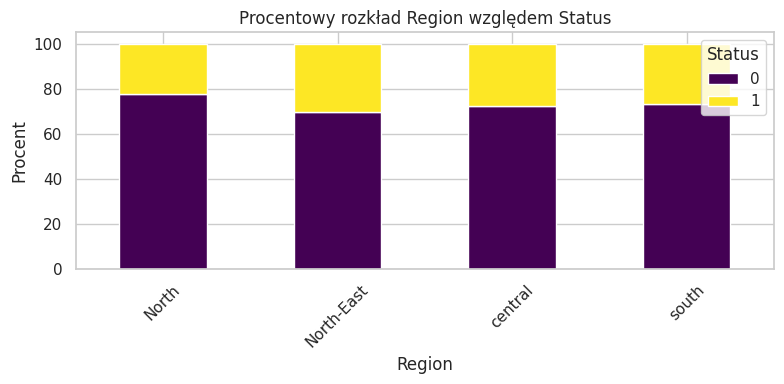

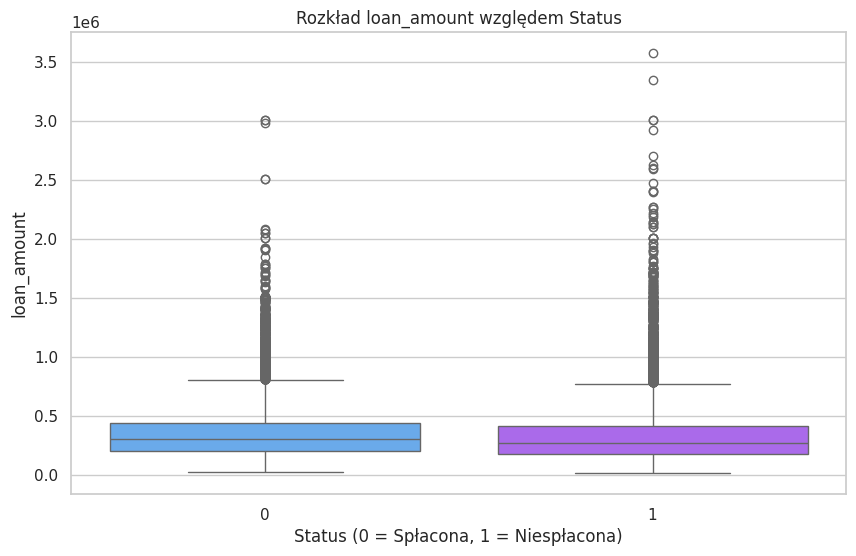

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

loan_data = pd.read_csv("../../data/Loan_Default.csv")

def plot_missing_values(data):
    missing = data.isnull().mean().sort_values(ascending=False)
    missing = missing[missing > 0]
    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing.index, y=missing.values)
    plt.xticks(rotation=90)
    plt.title("Proporcja brakujących wartości w kolumnach")
    plt.ylabel("Proporcja brakujących wartości")
    plt.xlabel("Kolumny")
    plt.show()

def plot_target_distribution(data, target):
    plt.figure(figsize=(6, 4))
    sns.countplot(x=target, data=data, hue=target, palette="viridis", legend=False)
    plt.title("Rozkład zmiennej docelowej")
    plt.xlabel("Status (0 = Spłacona, 1 = Niespłacona)")
    plt.ylabel("Liczba obserwacji")
    plt.show()

def plot_numerical_distributions(data, numerical_features):
    data[numerical_features].hist(figsize=(12, 10), bins=30, edgecolor="black")
    plt.suptitle("Rozkłady zmiennych numerycznych", fontsize=16)
    plt.show()

def plot_correlation_with_target(data, numerical_features, target):
    correlations = data[numerical_features].corrwith(data[target])
    correlations = correlations.sort_values()
    plt.figure(figsize=(10, 6))
    sns.barplot(x=correlations.index, y=correlations.values)
    plt.title("Korelacja zmiennych numerycznych ze zmienną docelową")
    plt.xticks(rotation=90)
    plt.ylabel("Korelacja")
    plt.xlabel("Zmienne numeryczne")
    plt.show()

def plot_correlation_matrix(data, features):
    correlation_matrix = data[features].corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title("Macierz korelacji między cechami")
    plt.show()

def plot_categorical_percentage(data, categorical_features, target):
    for feature in categorical_features:
        plt.figure(figsize=(8, 4))
        percentage = data.groupby([feature, target]).size().unstack(fill_value=0)
        percentage = (percentage.T / percentage.T.sum() * 100).T
        percentage.plot(kind="bar", stacked=True, colormap="viridis", ax=plt.gca())
        plt.title(f"Procentowy rozkład {feature} względem {target}")
        plt.ylabel("Procent")
        plt.xlabel(feature)
        plt.legend(title=target, loc="upper right")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

def plot_boxplot(data, column):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data, x="Status", y=column, hue="Status", palette="cool", legend=False)
    plt.title(f"Rozkład {column} względem Status")
    plt.xlabel("Status (0 = Spłacona, 1 = Niespłacona)")
    plt.ylabel(column)
    plt.show()

numerical_features = [
    "loan_amount", "rate_of_interest", "Interest_rate_spread", "Upfront_charges", 
    "term", "property_value", "income", "Credit_Score", "LTV", "dtir1"
]

categorical_features = [
    "Gender", "loan_type", "loan_purpose", "Credit_Worthiness", "Region"
]

target = "Status"

plot_missing_values(loan_data)
plot_target_distribution(loan_data, target)
plot_numerical_distributions(loan_data, numerical_features)
plot_correlation_with_target(loan_data, numerical_features, target)
plot_correlation_matrix(loan_data, numerical_features)
plot_categorical_percentage(loan_data, categorical_features, target)

plot_boxplot(loan_data, "loan_amount")